# Cove Edged GNRs (Mei-Yin Chou, Nano Lett, 2018)
![title](images/Mei-YinChou-1.png)

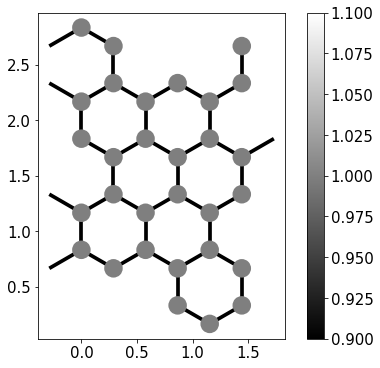

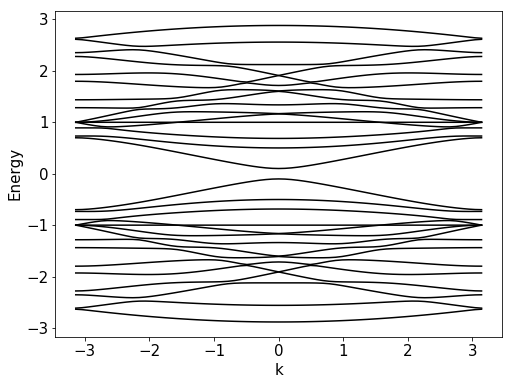

In [1]:
%run notebook_setup.ipy
from helper import *
N=12
L=6
Z7 = make_cove_edged_graphene(N=N,L=L)
cove_ribbon = finite_to_1D(Z7,get_length(L),trans_sym_direction='x')
kwant.plot(cove_ribbon,site_color=family_color);
kwant.plotter.bands(cove_ribbon.finalized());

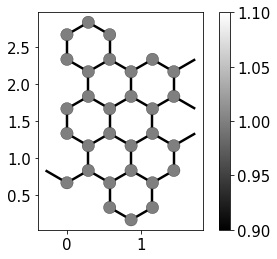

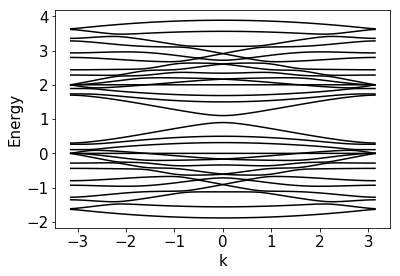


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-18 18:22:10,622                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11c2ea158>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

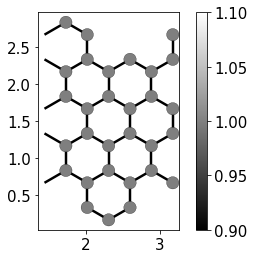

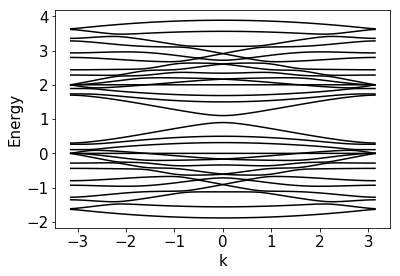


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-06-18 18:22:11,229                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x11cdef048>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

In [33]:
sites = list(Z7.sites())
pos = [ site.pos for site in sites]
#offset = np.linspace(0,get_length(L),100)
offset = [1,-1]
pol_N=[]
for off in offset:
    pos = np.array(translate(pos,-0.29,N,L))
    pos[:,0] = get_length(L) - off*pos[:,0]
    cove_lattice = kwant.lattice.general([[get_length(L),0],[0,get_width(N)]],pos)
    cove_ribbon = kwant.Builder(kwant.TranslationalSymmetry(cove_lattice.prim_vecs[0]))
    cove_ribbon[cove_lattice.shape((lambda pos: 0 <= pos[1] < get_width(N)),(0,0))]=1
    cove_ribbon[cove_lattice.neighbors()] = -1
    fig = kwant.plot(cove_ribbon,site_color=family_color,site_lw=0.01);
    cove_ribbon = cove_ribbon.finalized()
    kwant.plotter.bands(cove_ribbon);

    # Polarization calculation

    wcc_N={}
    import z2pack
    from Z2_compute import zak_bands as zak_bands_z2

    act_pos = np.array([cove_ribbon.pos(i) for i in range(len(sites))])
    a1,a2 = [cove_lattice.prim_vecs[0][0],get_width(N=N)]
    red_pos = np.zeros(np.shape(act_pos))
    red_pos[:,0] = act_pos[:,0]/a1
    red_pos[:,1] = act_pos[:,1]/a2


    ham_k=zak_bands_z2(cove_ribbon,momenta=1001,dim=2)
    z2_system = z2pack.hm.System(ham_k,dim=2,pos=red_pos,
                                     convention=2)
    result = z2pack.line.run(system=z2_system, 
                            line=lambda t1: [t1,0])#,#,n/(N+1)])#,
                            #pos_tol=1e-3,iterator=range(200,500,2));
    pol_N.append(result.pol)
    print("Polarization:",result.pol)

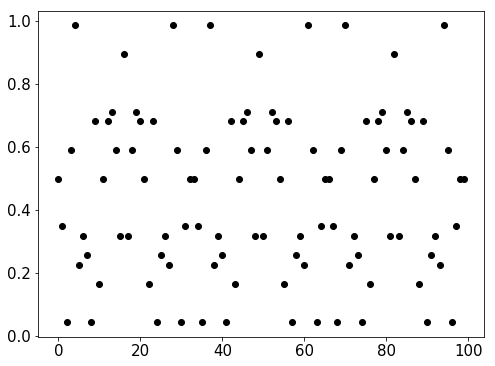

In [37]:
plt.plot(pol_N,'o')

#### We have shown that the same Cove edged GNR considered in Mei Yin Chou is Topologically non-trivial when the cove edge carbon rings are cut by the cell boundaries

#### By translating the atoms within the unit cell by half a lattice vectors, the cove edge rings can be brought back into the unit cell 

# Translated cove edged GNRs

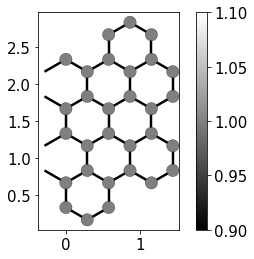

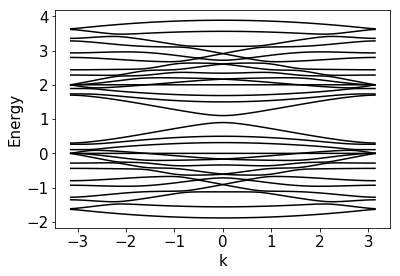


+----------------------------------------------------------------------+
|        ================                                              |
|        LINE CALCULATION                                              |
|        ================                                              |
|        starting at 2019-03-21 13:58:06,982                           |
|        running Z2Pack version 2.1.1                                  |
|                                                                      |
|        init_result: None                                             |
|        iterator:    range(8, 27, 2)                                  |
|        line:        <function <lambda> at 0x12006aea0>               |
|        load:        False                                            |
|        load_quiet:  True                                             |
|        pos_tol:     0.01                                             |
|        save_file:   None                        

In [27]:
sites = list(Z7.sites())
pos = [ site.pos for site in sites]

## Translating the boundaries of the unit cell on a fixed lattice
pos = translate(pos,a1/2.0,N,L)


cove_lattice = kwant.lattice.general([[get_length(L),0],[0,get_width(N)]],pos)
cove_ribbon = kwant.Builder(kwant.TranslationalSymmetry(cove_lattice.prim_vecs[0]))
cove_ribbon[cove_lattice.shape((lambda pos: 0 <= pos[1] < get_width(N)),(0,0))]=1
cove_ribbon[cove_lattice.neighbors()] = -1
fig = kwant.plot(cove_ribbon,site_color=family_color,site_lw=0.01);
cove_ribbon = cove_ribbon.finalized()
kwant.plotter.bands(cove_ribbon);

#Polarization calculation
pol_N={}
wcc_N={}
import z2pack
from Z2_compute import zak_bands as zak_bands_z2

act_pos = np.array([cove_ribbon.pos(i) for i in range(len(sites))])
a1,a2 = [cove_lattice.prim_vecs[0][0],get_width(N=N)]
red_pos = np.zeros(np.shape(act_pos))
red_pos[:,0] = act_pos[:,0]/a1
red_pos[:,1] = act_pos[:,1]/a2


ham_k=zak_bands_z2(cove_ribbon,momenta=1001,dim=2)
z2_system = z2pack.hm.System(ham_k,dim=2,pos=red_pos,
                                 convention=1)
result = z2pack.line.run(system=z2_system, 
                        line=lambda t1: [t1,0])#,n/(N+1)])#,
                        #pos_tol=1e-3,iterator=range(200,500,2));

print("Polarization:",result.pol)

# TODO: 

### 1. Final step validation, consider other cells chevron and bent cove edged GNRs

![title](images/chevron.png)
![title](images/Bent_cove.png)
### 2. Visualize the junction states between two topologically distinct phase 

![title](images/junction.png)
### 3. Integrate into evolutionary algorithm to sample the design phase in 1D.
### 4. Can be extended to 2D with very little modification since Z2pack can directly calculate the Z2  - already tested for Kagome lattice

### 5. Seems to work only for gaped systems. May be the eigenvectors are getting mixed at the intersection in gapless cases. Is there a way to resolve this?